# Algorithm Comparison on Three Classes of Disease

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
weka_3C = pd.read_csv("dataset/column_3C_weka.csv")



In [3]:
weka_3C.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
# checking any null cells
weka_3C.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [5]:
weka_3C.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


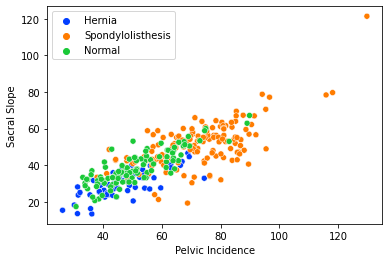

In [6]:
# some relations between features
sns.scatterplot(data = weka_3C, x = "pelvic_incidence", y = "sacral_slope", hue = "class", palette = "bright")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.legend()
plt.show()

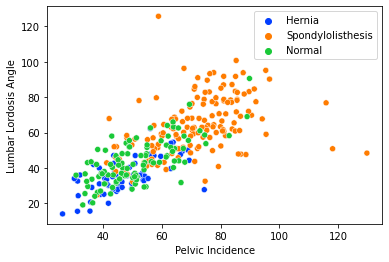

In [7]:
# some relations between features
sns.scatterplot(data = weka_3C, x = "pelvic_incidence", y = "lumbar_lordosis_angle", hue = "class", palette = "bright")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Lumbar Lordosis Angle")
plt.legend()
plt.show()

In [8]:
# Let's convert these categorical values into numeric
weka_3C["class"].replace(["Hernia", "Spondylolisthesis", "Normal"], [0, 1, 2], inplace=True)

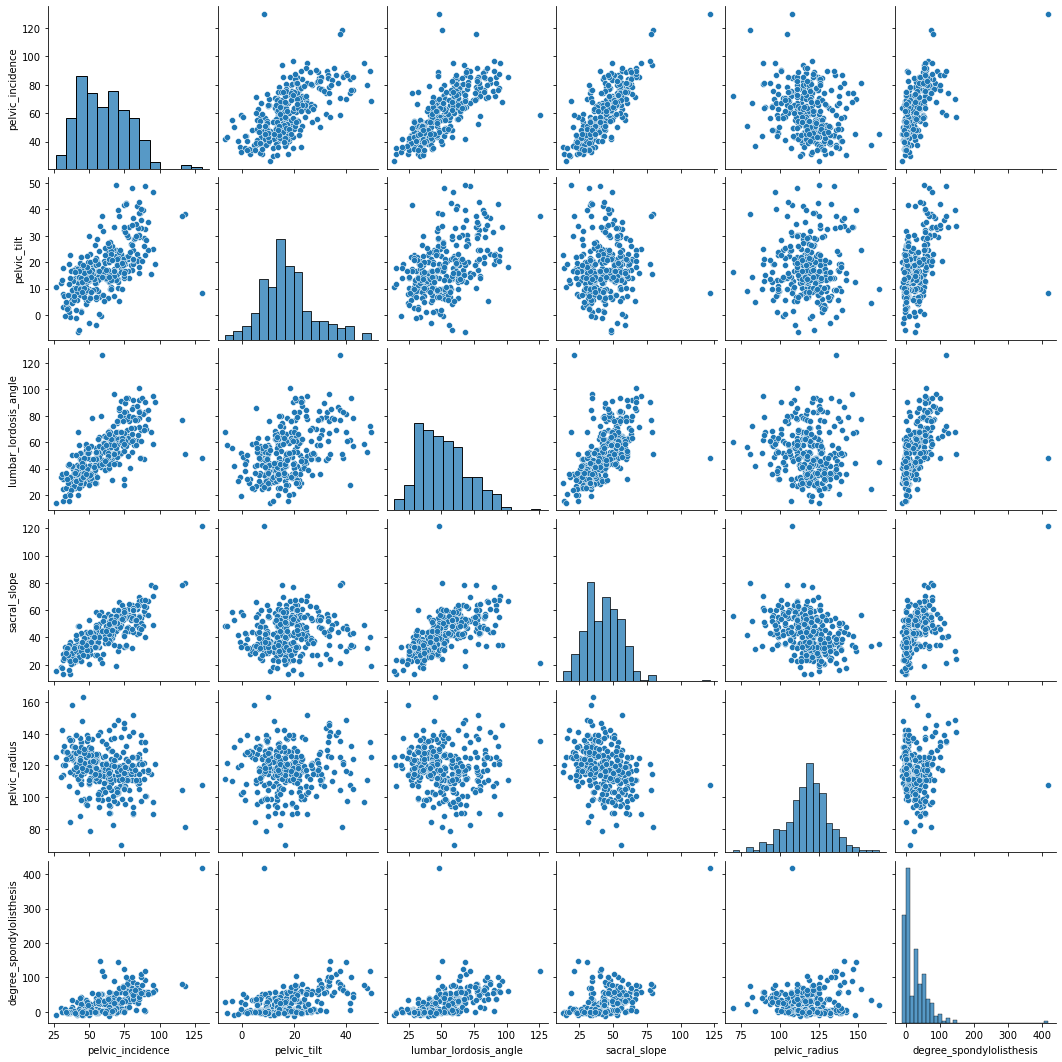

In [9]:
# split dataset into x and y
y = weka_3C["class"].values # classes
x_data = weka_3C.drop(["class"], axis=1) # features



# Relations between features
sns.pairplot(x_data)
plt.show()

In [10]:
# normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [11]:
# train-test-split time - 15% for test, 85½ for train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

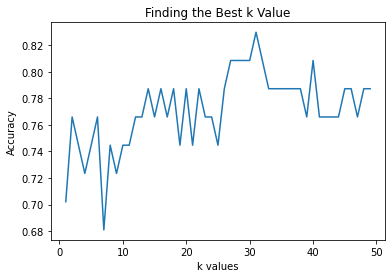

In [12]:
# KNN algorithm

# looking for best k value
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Finding the Best k Value")
plt.show()

In [13]:
neighbor = 31
knn = KNeighborsClassifier(n_neighbors = neighbor)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} KNN Model Test Accuracy: {} ". format(neighbor, knn.score(x_test, y_test)))

 31 KNN Model Test Accuracy: 0.8297872340425532 


In [14]:
neighbor = 32
knn = KNeighborsClassifier(n_neighbors = neighbor)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} KNN Model Test Accuracy: {} ". format(neighbor, knn.score(x_test, y_test)))

 32 KNN Model Test Accuracy: 0.8085106382978723 


In [15]:
# Support Vector Machine Algorithm

# train
svm = SVC(random_state=1)
svm.fit(x_train,y_train)

# test
print("SVM Model Accuracy: {}".format(svm.score(x_test,y_test)))

SVM Model Accuracy: 0.8085106382978723


In [16]:
# Decision Tree Algorithm

# train
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

# test
print("DT Model Accuracy: {}".format(dt.score(x_test,y_test)))

DT Model Accuracy: 0.7446808510638298


In [17]:
# Random Forests Algorithm

# train
rf = RandomForestClassifier(n_estimators = 100, random_state = 1) # for 100 trees
rf.fit(x_train,y_train)
# test
print("RF Model Accuracy: {}".format(rf.score(x_test,y_test)))

RF Model Accuracy: 0.851063829787234


# Conclusion
As a result of comparing these four algorithms, Random Forest Algorithm gives a better result.